# Introduction to digital quantum computing

Information for challengers: the first steps are the harder ones. In this challenge, you will clean the path for the newcomers by showing them what's a qubit and how to compute combining them. Follow the started structure to find the 

Sources (Qibo):  
https://qibogang.github.io/docs/qibo/stable  
https://qibogang.github.io/tutorials/1_getting-started  


Sources (not Qibo):   
https://www.iqmacademy.com/curriculum/foundations02.html  
https://learning.quantum.ibm.com/course/basics-of-quantum-information/quantum-circuits

## 1st exercise: basic tutorial

Follow the tutorial from [qibo](https://qibogang.github.io/tutorials/1_getting-started) to get familiar with the environment. You can do it in this notebook.

Let's start importing qibo and the modules required for building our first circuit. We set the default numpy backend for this tutorial.

In [1]:
import qibo
from qibo.models import Circuit
from qibo import gates

qibo.set_backend("numpy")

[Qibo 0.2.8|INFO|2024-10-04 17:31:01]: Using numpy backend on /CPU:0


After this, we can start to do quantum circuit simulation using qibo.

**Simulating the superposition**  
Now we can build up a simple circuit composed of one qubit and an Hadamard gate. This gate is such that, if applied to a ∣0⟩ state, it returns the following superposition of the fundamental states.    

At the end of the circuit we put a measurement gate, in order to be able to project the final state on the z direction and to perform a simple measurement operation.

In [2]:
# initialize the circuit
c = Circuit(1)

# add gates
c.add(gates.H(q=0))
c.add(gates.M(0))

# draw circuit
print(c.draw())

q0: ─H─M─


Now we can execute the circuit 1000 times (nshots=1000), and use the simulation tool for getting the results.

In [3]:
simulated_final_state = c(nshots=1000)

print(simulated_final_state)

(0.70711+0j)|0> + (0.70711+0j)|1>


With this execution we simulate the final state obtained applying an Hadamard gate on an initial ∣0⟩ state.

**Printing frequencies**    
Now we can use the frequencies method for visualizing the obtained results. One way to do that is to activate the binary=False option; thanks to this we get a counter object which shows us how many times the two fundamental states are registered after one thousand of executions.

In [4]:
simulated_final_state.frequencies(binary=False)

Counter({0: 504, 1: 496})

**Printing probabilities**  
Alternatively, we can use the probabilities method.

In [5]:
# calculating probabilities
probabilities = simulated_final_state.probabilities

# showing the two probabilities
print(probabilities(qubits=[0]))

[0.5 0.5]


As expected, the probability of obtaining each of the two fundamental states is equal to 0.5.

you can repeat this experiment many times, but you will always get these probabilities as results.

In [6]:
for _ in range(10):
    final_state = c(nshots=1000)
    probabilities = simulated_final_state.probabilities
    print(probabilities(qubits=[0]))

[0.5 0.5]
[0.5 0.5]
[0.5 0.5]
[0.5 0.5]
[0.5 0.5]
[0.5 0.5]
[0.5 0.5]
[0.5 0.5]
[0.5 0.5]
[0.5 0.5]


If you are following the qibo tutorial from the webpage, stop here.

## 2nd exercise: Bit flip

Follow the learnt syntaxis to run a bitflip using qibo.  
  
Probably, the most basic operation that we can perform on a qbit is a bitflip. This operation consist on, given any basis state, inverting its value: 
$$ \left| 0 \right> \rightarrow \left| 1 \right>, \left| 1 \right> \rightarrow \left| 0 \right>$$


Given that we always take meassurements on the Z axis, the bitflip can be applied by performing a simple Pauli X-Gate. This is, a $\pi$ radian rotation along the X axis.

<img src="./media/x_gate.png" alt="x_gate" class="bg-primary" width="580" style="display=block; margin-left:auto; margin-right:auto"/>

We will use this as a first exercise with Qibo circuits. Lets first import everything we need.
* [Qibo Circuits](https://qibo.science/qibo/stable/api-reference/qibo.html#circuit-models)
* [Qibo Gates](https://qibo.science/qibo/stable/api-reference/qibo.html#gates)

In [1]:
# Imports

from qibo.gates import X, M
from qibo.models.circuit import Circuit

In [2]:
# Build the circuit. Create a circuit instance and add to it an X gate to the 0th qbit and a Meassurement to all qbits.


We can check the circuit using the `.summary()` and `.draw()` methods.

In [3]:
# Look at the outputs of summary and draw infomrative methods.


We can finally call `execute()` to simmulate the execution of the circuit. We can examine the resulting object to see that the results are the expected ones.

For simple circuits, we expect a the results to be an instance of `qibo.result.CircuitResult`, but more complex circuits could also return a `qibo.result.QuantumState`, or a `qibo.result.MeasurementOutcomes`. Choosing a different qibo backend will also lead to different result objects. Docs are available at:
* [Circuit.execute()](https://qibo.science/qibo/stable/api-reference/qibo.html#qibo.models.circuit.Circuit.execute)
* [CircuitResult](https://qibo.science/qibo/stable/api-reference/qibo.html#qibo.result.CircuitResult)
* [QuantumState](https://qibo.science/qibo/stable/api-reference/qibo.html#qibo.result.QuantumState)
* [MeasurementOutcomes](https://qibo.science/qibo/stable/api-reference/qibo.html#qibo.result.MeasurementOutcomes)

In [4]:
# Execute the circuit.


Several methods exist for examining the outcome of an execution. `frequencies()` counts the ocurrences of each state, `probabilities()` computes the `frequencies() / nshots` for each possible state in order, and `samples()` **generates** a distribution of states based on the theoretical distribution. More info on the api for each class, linked above.

In [5]:
# Check the frequencies, probabilities and sample methods.


## 3rd exercise: Quantum teleportation

In this example we will dive into quantum teleportation doing first a single teleportation, then several consecutive teleportations and we will end with a network. Find more details at the PDF called "Teleportation and QuantumNetworks.pdf".

### Imports and global variables:

In [7]:
import numpy as np

from qibo import Circuit, gates

from helper_functions import random_state,print_random_state, print_theoretical_values, print_sampled_values, get_probabilities, execute_get_samples_and_plot, create_networkx_graph, print_networkx_graph, compute_network_path, create_secure_quantum_teleportation_path_circuit

# Number of `shots` we will use during this notebook:
shots = 10_000

### 1) Random initial state:

Let's generate a `random state`, for `Alice`!

In [8]:
# Generate random state:
theta, phi = random_state()
alpha, beta = np.cos(theta/2), np.sin(theta/2)*np.exp(phi*1.j)*-1.j
prob_a, prob_b = np.cos(theta/2)**2, np.sin(theta/2)**2
print_random_state(theta, phi)

Theta: 2.7669934551790796, Phi: -1.9307265208974014
State: alpha=0.18620640458790377  beta=(-0.9195527538880768+0.3460489961079211j)
Probabilities: prob_a=0.03467282510955411  prob_b=0.965327174890446



Now let's do a small `circuit` and see its `results` and `probabilities`:

[Qibo 0.2.8|INFO|2024-10-04 23:56:09]: Using numpy backend on /CPU:0


Circuit:
q0: ─U1q─M─

THEORETICAL VALUES:
State: [ 0.1862064 +0.j       -0.91955275+0.346049j]
Probabilities: [0.03467283 0.96532717]

SAMPLED VALUES:
Samples: [[1 1 1 ... 1 1 1]]
Frequencies: Counter({'1': 9643, '0': 357})
Sampled probabilities: {'0': 0.0357, '1': 0.9643}


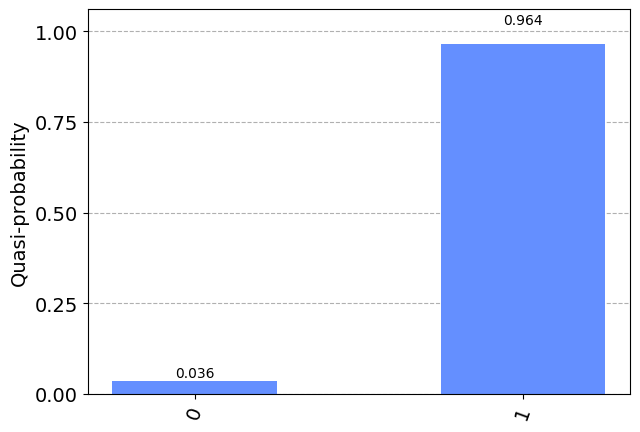

In [9]:
# Define a small circuit to check its probabilities:
c0 = Circuit(1)
c0.add(gates.U1q(q=0, theta=theta, phi=phi))
c0.add(gates.M(0))

# Plot the circuit:
print(f"Circuit:\n{c0.draw()}\n")

# Run the circuit:
result = c0(nshots=shots)

# Theoretical values:
state = result.state()
probabilities = result.probabilities()
print_theoretical_values(state, probabilities)

# Sampled values (with nshots):
# (possible because we have a Measurement gate!)
samples = np.stack(result.samples(), axis=1)
frequencies = result.frequencies()
sampled_probabilities = get_probabilities(frequencies)
print_sampled_values(samples, frequencies, sampled_probabilities)

### 2) Teleportation circuit:


Now we will generate the previously shown `circuit` for quantum teleportation:

In [10]:
# Define teleport circuit
c = Circuit(3)

# Initial Alice random state
c.add(gates.U1q(q=0, theta=theta, phi=phi))

# Initial Alice-Bob entangled state
c.add(gates.H(1))
c.add(gates.CNOT(1,2))

# Entanglement measure of Alice
c.add(gates.CNOT(0,1))
c.add(gates.H(0))
c.add(gates.M(0))
c.add(gates.M(1))

# From Alice's results, Bob does control Z's & X's:
c.add(gates.CZ(0,2))
c.add(gates.CNOT(1,2))
c.add(gates.M(2, register_name="measure"))

# Plot the circuit:
print(f"Circuit:\n{c.draw()}\n")

Circuit:
q0: ─U1q───o─H─M─o─────
q1: ─H───o─X─M───|─o───
q2: ─────X───────Z─X─M─



SAMPLED VALUES:
Samples: [[1 1 1 ... 1 1 1]]
Frequencies: Counter({'1': 9655, '0': 345})
Sampled probabilities: {'0': 0.0345, '1': 0.9655}


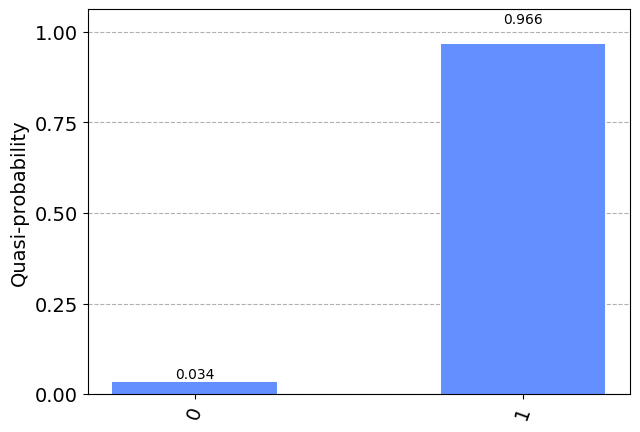

In [11]:
execute_get_samples_and_plot(circuit=c, shots=shots)

### 3) CONSECUTIVE QUANTUM TELEPORTS:

Using an `intermediary B` we can connect `A` and `C`, that have never met before!

First lets define the `graph` for such case:

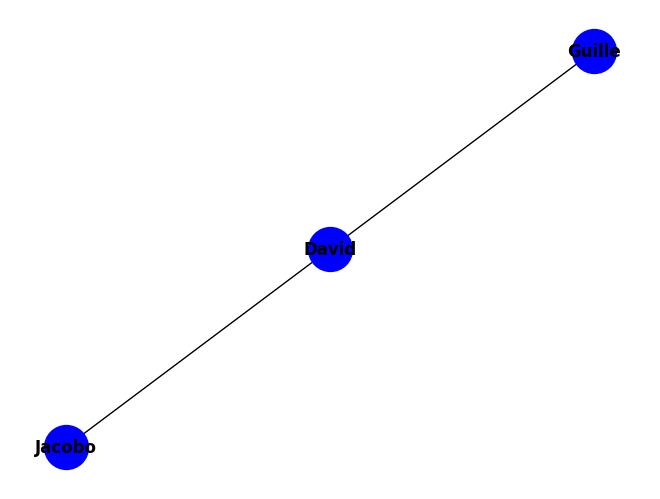

In [12]:
edges = {
    ("Guille", "David"): "",
    ("David", "Jacobo"): "",
}
G = create_networkx_graph(edges)
print_networkx_graph(G, edges)

Now, lets do the `circuit`. Notice its the same, but with everything `duplicated`!

In [13]:
# Define teleport circuit
c = Circuit(5)

# Initial Alice random state
c.add(gates.U1q(q=0, theta=theta, phi=phi))

# Initial entangled states:
c.add(gates.H(1))
c.add(gates.CNOT(1,2))

c.add(gates.H(3))
c.add(gates.CNOT(3,4))

# Entanglement measurements
c.add(gates.CNOT(0,1))
c.add(gates.H(0))
c.add(gates.M(0))
c.add(gates.M(1))

c.add(gates.CNOT(2,3))
c.add(gates.H(2))
c.add(gates.M(2))
c.add(gates.M(3))

# From the obtained results, we do control Z's and X's to Bob:
c.add(gates.CZ(0,4))
c.add(gates.CNOT(1,4))

c.add(gates.CZ(2,4))
c.add(gates.CNOT(3,4))

c.add(gates.M(4, register_name="measure"))

# Plot the circuit:
print(f"Circuit:\n{c.draw()}\n")

Circuit:
q0: ─U1q───────o─H─M───────o─────────
q1: ─H───o─────X─M─────────|─o───────
q2: ─────X───────────o─H─M─|─|─o─────
q3: ───────H─o───────X─M───|─|─|─o───
q4: ─────────X─────────────Z─X─Z─X─M─



SAMPLED VALUES:
Samples: [[1 1 1 ... 1 1 1]]
Frequencies: Counter({'1': 9661, '0': 339})
Sampled probabilities: {'0': 0.0339, '1': 0.9661}


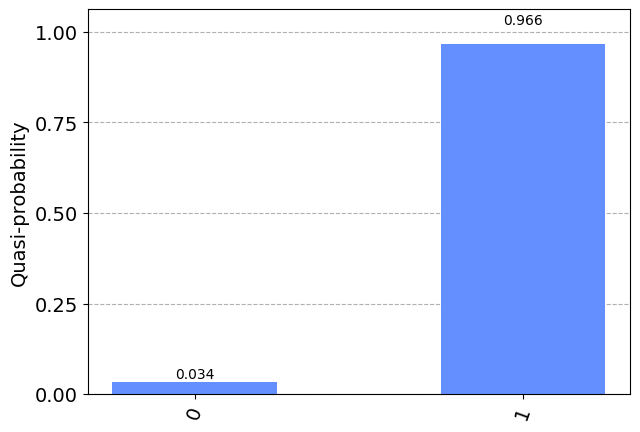

In [14]:
execute_get_samples_and_plot(circuit=c, shots=shots)

### 4) QUANTUM TELEPORTATION NETWORK:


Now lets define a more complicated `graph` for a possible `quantum network`:

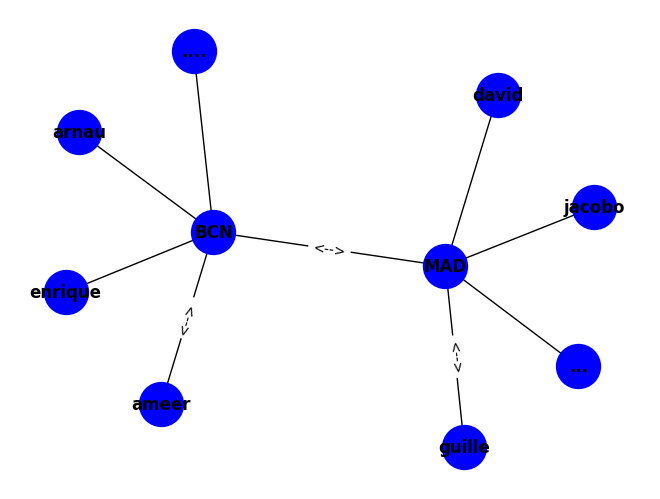

In [15]:
# Our secure quantum teleportation network is:
edges = {
    ("guille","MAD"): "<-->",
    ("david","MAD"): "",
    ("jacobo","MAD"): "",
    ("...", "MAD"): "",
    ("arnau", "BCN"): "",
    ("ameer", "BCN"): "<-->",
    ("enrique", "BCN"): "",
    ("....", "BCN"): "",
    ("BCN", "MAD"): "<-->",
}
graph_to_travel = create_networkx_graph(edges)
print_networkx_graph(graph_to_travel, edges)

Now telling `who` wants to send a quantum state, and to who, `we compute the needed quantum circuit`!

In [16]:
# Guille wants to send a message to ameer:
sender = "guille"
receiver = "ameer"

# Search for the edges with shortest path
edges = compute_network_path(graph=graph_to_travel, sender=sender, receiver=receiver)
print(f"The path to follow is: {edges}")

# Create and plot the neede circuit:
automatic_circuit = create_secure_quantum_teleportation_path_circuit((theta,phi), edges)

# Plot the circuit:
print(f"Circuit:\n{automatic_circuit.draw()}\n")

The path to follow is: [('guille', 'MAD'), ('MAD', 'BCN'), ('BCN', 'ameer')]
Circuit:
q0: ─────────────U1q─o─H─M─────────────o─────────────
q1: ─H─o─────────────X─M───────────────|─o───────────
q2: ───X───────────────────o─H─M───────|─|─o─────────
q3: ─────H─o───────────────X─M─────────|─|─|─o───────
q4: ───────X─────────────────────o─H─M─|─|─|─|─o─────
q5: ─────────H─o─────────────────X─M───|─|─|─|─|─o───
q6: ───────────X───────────────────────Z─X─Z─X─Z─X─M─



SAMPLED VALUES:
Samples: [[1 1 1 ... 1 1 1]]
Frequencies: Counter({'1': 9653, '0': 347})
Sampled probabilities: {'0': 0.0347, '1': 0.9653}


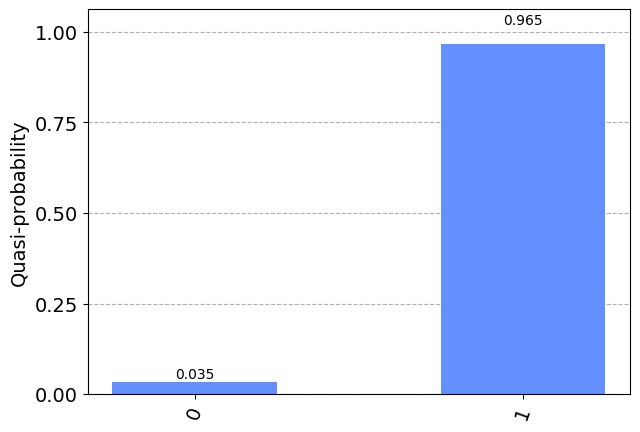

In [17]:
execute_get_samples_and_plot(circuit=c, shots=shots)

IT WORKS PERFECTLY!!!